# 第十五讲：子空间投影

从$\mathbb{R}^2$空间讲起，有向量$a, b$，做$b$在$a$上的投影$p$，如图：


/Users/gaufung/Anaconda/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


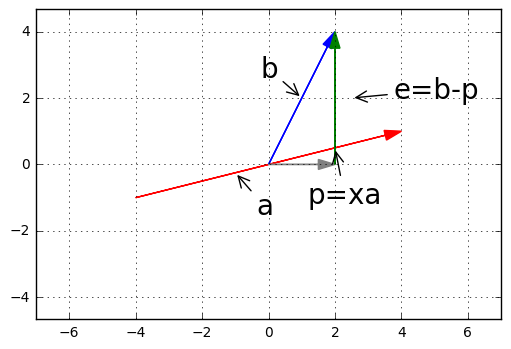

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("seaborn-dark-palette")

fig = plt.figure()
plt.axis('equal')
plt.axis([-7, 7, -6, 6])
plt.arrow(-4, -1, 8, 2, head_width=0.3, head_length=0.5, color='r', length_includes_head=True)
plt.arrow(0, 0, 2, 4, head_width=0.3, head_length=0.5, color='b', length_includes_head=True)
plt.arrow(0, 0, 48/17, 12/17, head_width=0.3, head_length=0.5, color='gray', length_includes_head=True)
plt.arrow(48/17, 12/17, 2-48/17, 4-12/17, head_width=0.3, head_length=0.5, color='g', length_includes_head=True)
# plt.plot([48/17], [12/17], 'o')
# y=1/4x
# y=-4x+12
# x=48/17
# y=12/17
plt.annotate('b', xy=(1, 2), xytext=(-30, 15), textcoords='offset points', size=20, arrowprops=dict(arrowstyle="->"))
plt.annotate('a', xy=(-1, -0.25), xytext=(15, -30), textcoords='offset points', size=20, arrowprops=dict(arrowstyle="->"))
plt.annotate('e=b-p', xy=(2.5, 2), xytext=(30, 0), textcoords='offset points', size=20, arrowprops=dict(arrowstyle="->"))
plt.annotate('p=xa', xy=(2, 0.5), xytext=(-20, -40), textcoords='offset points', size=20, arrowprops=dict(arrowstyle="->"))
plt.grid()


In [2]:
plt.close(fig)

从图中我们知道，向量$e$就像是向量$b, p$之间的误差，$e=b-p, e \bot p$。$p$在$a$上，有$\underline{p=ax}$。

所以有$a^Te=a^T(b-p)=a^T(b-ax)=0$。关于正交的最重要的方程：

$$
a^T(b-xa)=0 \\
\underline{xa^Ta=a^Tb} \\
\underline{x=\frac{a^Tb}{a^Ta}} \\
p=a\frac{a^Tb}{a^Ta}
$$

从上面的式子可以看出，如果将$b$变为$2b$则$p$也会翻倍，如果将$a$变为$2a$则$p$不变。

设投影矩阵为$P$，则可以说投影矩阵作用与某个向量后，得到其投影向量，$projection_p=Pb$。

易看出$\underline{P=\frac{aa^T}{a^Ta}}$，若$a$是$n$维列向量，则$P$是一个$n \times n$矩阵。

观察投影矩阵$P$的列空间，$C(P)$是一条通过$a$的直线，而$rank(P)=1$（一列乘以一行：$aa^T$，而这一列向量$a$是该矩阵的基）。

投影矩阵的性质：

* $\underline{P=P^T}$，投影矩阵是一个对称矩阵。
* 如果对一个向量做两次投影，即$PPb$，则其结果仍然与$Pb$相同，也就是$\underline{P^2=P}$。

为什么我们需要投影？因为就像上一讲中提到的，有些时候$Ax=b$无解，我们只能求出最接近的那个解。

$Ax$总是在$A$的列空间中，而$b$却不一定，这是问题所在，所以我们可以将$b$变为$A$的列空间中最接近的那个向量，即将无解的$Ax=b$变为求有解的$A\hat{x}=p$（$p$是$b$在$A$的列空间中的投影，$\hat{x}$不再是那个不存在的$x$，而是最接近的解）。

现在来看$\mathbb{R}^3$中的情形，将向量$b$投影在平面$A$上。同样的，$p$是向量$b$在平面$A$上的投影，$e$是垂直于平面$A$的向量，即$b$在平面$A$法方向的分量。
设平面$A$的一组基为$a_1, a_2$，则投影向量$p=\hat{x_1}a_1+\hat{x_2}a_2$，我们更倾向于写作$p=A\hat{x}$，这里如果我们求出$\hat{x}$，则该解就是无解方程组最近似的解。

现在问题的关键在于找$e=b-A\hat{x}$，使它垂直于平面，因此我们得到两个方程
$
\begin{cases}a_1^T(b-A\hat{x})=0\\
a_2^T(b-A\hat{x})=0\end{cases}
$，将方程组写成矩阵形式
$
\begin{bmatrix}a_1^T\\a_2^T\end{bmatrix}
(b-A\hat{x})=
\begin{bmatrix}0\\0\end{bmatrix}
$，即$A^T(b-A\hat{x})=0$。

比较该方程与$\mathbb{R}^2$中的投影方程，发现只是向量$a$变为矩阵$A$而已，本质上就是$A^Te=0$。所以，$e$在$A^T$的零空间中（$e\in N(A^T)$），从前面几讲我们知道，左零空间$\bot$列空间，则有$e\bot C(A)$，与我们设想的一致。

再化简方程得$A^TAx=A^Tb$，比较在$\mathbb{R}^2$中的情形，$a^Ta$是一个数字而$A^TA$是一个$n$阶方阵，而解出的$x$可以看做两个数字的比值。现在在$\mathbb{R}^3$中，我们需要再次考虑：什么是$\hat{x}$？投影是什么？投影矩阵又是什么？

* 第一个问题：$\hat x=(A^TA)^{-1}A^Tb$；
* 第二个问题：$p=A\hat x=\underline{A(A^TA)^{-1}A^T}b$，回忆在$\mathbb{R}^2$中的情形，下划线部分就是原来的$\frac{aa^T}{a^Ta}$；
* 第三个问题：易看出投影矩阵就是下划线部分$P=A(A^TA)^{-1}A^T$。

这里还需要注意一个问题，$P=A(A^TA)^{-1}A^T$是不能继续化简为$P=AA^{-1}(A^T)^{-1}A^T=I$的，因为这里的$A$并不是一个可逆方阵。
也可以换一种思路，如果$A$是一个$n$阶可逆方阵，则$A$的列空间是整个$\mathbb{R}^n$空间，于是$b$在$\mathbb{R}^n$上的投影矩阵确实变为了$I$，因为$b$已经在空间中了，其投影不再改变。

再来看投影矩阵$P$的性质：
* $P=P^T$：有
$
\left[A(A^TA)^{-1}A^T\right]^T=A\left[(A^TA)^{-1}\right]^TA^T
$，而$(A^TA)$是对称的，所以其逆也是对称的，所以有$A((A^TA)^{-1})^TA^T=A(A^TA)^{-1}A^T$，得证。
* $P^2=P$：有
$
\left[A(A^TA)^{-1}A^T\right]\left[A(A^TA)^{-1}A^T\right]=A(A^TA)^{-1}\left[(A^TA)(A^TA)^{-1}\right]A^T=A(A^TA)^{-1}A^T
$，得证。

## 最小二乘法

接下看看投影的经典应用案例：最小二乘法拟合直线（least squares fitting by a line）。

我们需要找到距离图中三个点 $(1, 1), (2, 2), (3, 2)$ 偏差最小的直线：$b=C+Dt$。

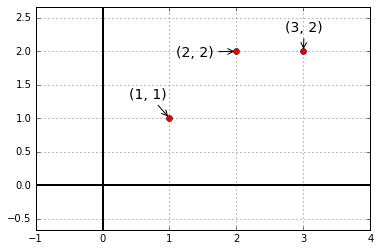

In [3]:
plt.style.use("seaborn-dark-palette")

fig = plt.figure()
plt.axis('equal')
plt.axis([-1, 4, -1, 3])
plt.axhline(y=0, c='black', lw='2')
plt.axvline(x=0, c='black', lw='2')

plt.plot(1, 1, 'o', c='r')
plt.plot(2, 2, 'o', c='r')
plt.plot(3, 2, 'o', c='r')

plt.annotate('(1, 1)', xy=(1, 1), xytext=(-40, 20), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('(2, 2)', xy=(2, 2), xytext=(-60, -5), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('(3, 2)', xy=(3, 2), xytext=(-18, 20), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))

plt.grid()

In [4]:
plt.close(fig)

根据条件可以得到方程组 
$
\begin{cases}
C+D&=1 \\
C+2D&=2 \\
C+3D&=2 \\
\end{cases}
$，写作矩阵形式
$\begin{bmatrix}1&1 \\1&2 \\1&3\\\end{bmatrix}\begin{bmatrix}C\\D\\\end{bmatrix}=\begin{bmatrix}1\\2\\2\\\end{bmatrix}$，也就是我们的$Ax=b$，很明显方程组无解。但是$A^TA\hat x=A^Tb$有解，于是我们将原是两边同时乘以$A^T$后得到的新方程组是有解的，$A^TA\hat x=A^Tb$也是最小二乘法的核心方程。

下一讲将进行最小二乘法的验算。